# Mounting the Drive

In [ ]:
from google.colab import drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing essential libraries 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from keras.preprocessing import image
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

##Loading dataset

In [ ]:
# Normalizing the images using imagedatagenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        rotation_range=20,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
      )
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Provided the google drive link to upload the dataset
# Uploading images with the target size of 128 x 128 pixels in RGB format 

# train_generator contains the images on which the model is to be train
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Others/Face Mask Dataset/Train',
        target_size=(150,150),
         color_mode="grayscale",
        batch_size=32,
        class_mode='binary')

# validation_generator contains the images on which we are validating the model
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Others/Face Mask Dataset/Validation',
        target_size=(150,150),
         color_mode="grayscale",
        batch_size=32,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


##Library for neural network

In [ ]:
# Importing libraries which require to build model architecture
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,InputLayer, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D

## Creating Convolutional Neural Network Model

In [ ]:
# building seqential model
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization()) 
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
# Summarizing all the layer in model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Adding callback to keep a track on leaning rate and doing neccesory changes
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
callbacks = [EarlyStopping(patience=4, monitor='val_loss', mode='min'), 
             ReduceLROnPlateau(patience=2, verbose=1)]             

In [ ]:
# Training the model with 30 epochs and with the batch size of 100
n_epochs = 30
batch_size = 100
history = model.fit(train_generator,  
                           epochs=n_epochs, 
                           callbacks=callbacks,
                           validation_data=validation_generator)

Epoch 1/30
313/313 [==============================] - 71s 220ms/step - loss: 0.4974 - accuracy: 0.8510 - val_loss: 0.5629 - val_accuracy: 0.7075 - lr: 0.0010
Epoch 2/30
313/313 [==============================] - 66s 209ms/step - loss: 0.1833 - accuracy: 0.9296 - val_loss: 0.1180 - val_accuracy: 0.9575 - lr: 0.0010
Epoch 3/30
313/313 [==============================] - 65s 208ms/step - loss: 0.1564 - accuracy: 0.9404 - val_loss: 0.0520 - val_accuracy: 0.9737 - lr: 0.0010
Epoch 4/30
313/313 [==============================] - 65s 207ms/step - loss: 0.1309 - accuracy: 0.9517 - val_loss: 0.0537 - val_accuracy: 0.9787 - lr: 0.0010
Epoch 5/30
313/313 [==============================] - ETA: 0s - loss: 0.1170 - accuracy: 0.9581
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
313/313 [==============================] - 65s 207ms/step - loss: 0.1170 - accuracy: 0.9581 - val_loss: 0.2111 - val_accuracy: 0.9025 - lr: 0.0010
Epoch 6/30
313/313 [========================

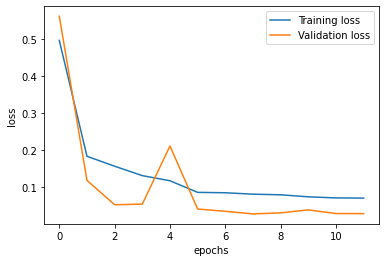

In [ ]:
# Visulizing the loss functions
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label="Training loss")
plt.plot(history.history['val_loss'],label="Validation loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

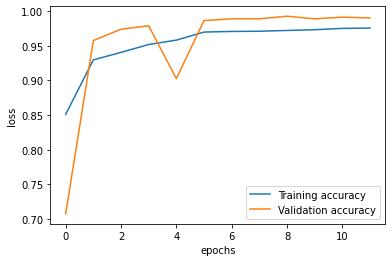

In [ ]:
# Visualizing the accuracy of model
plt.plot(history.history['accuracy'],label="Training accuracy")
plt.plot(history.history['val_accuracy'],label="Validation accuracy")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# Saving the model
model.save("model.h5",model)